## Step 1: Importing All Library

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from patsy import dmatrices
import scikitplot as skplt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
df=sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
#Report = ProfileReport(df)
#Report.to_file('affaris_report.html')

## Step 2: Data Preprocessing

In [4]:
#Datatype Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [5]:
#converting into binary features
df['affairs'] = (df.affairs>0).astype(int)

In [6]:
df['affairs'].unique()

array([1, 0])

In [7]:
#Here we will use pasty.dmatrices, it’s main task is to analyze the independent variable and dependent variable
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + \
                 C(occupation_husb)',df, return_type="dataframe")
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [8]:
#Rename The Feature Column
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2', 'C(occupation)[T.3.0]':'occ_3', 'C(occupation)[T.4.0]':'occ_4',
                       'C(occupation)[T.5.0]':'occ_5', 'C(occupation)[T.6.0]':'occ_6',
                       'C(occupation_husb)[T.2.0]':'occ_husb_2', 'C(occupation_husb)[T.3.0]':'occ_husb_3',
                       'C(occupation_husb)[T.4.0]':'occ_husb_4', 'C(occupation_husb)[T.5.0]':'occ_husb_5',
                       'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [9]:
df = pd.concat([X,y],axis=1)
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [10]:
df.isnull().any()

Intercept        False
occ_2            False
occ_3            False
occ_4            False
occ_5            False
occ_6            False
occ_husb_2       False
occ_husb_3       False
occ_husb_4       False
occ_husb_5       False
occ_husb_6       False
rate_marriage    False
age              False
yrs_married      False
children         False
religious        False
educ             False
affairs          False
dtype: bool

In [11]:
print(df[df['affairs']==0].shape)
print(df[df['affairs']==1].shape)

(4313, 18)
(2053, 18)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


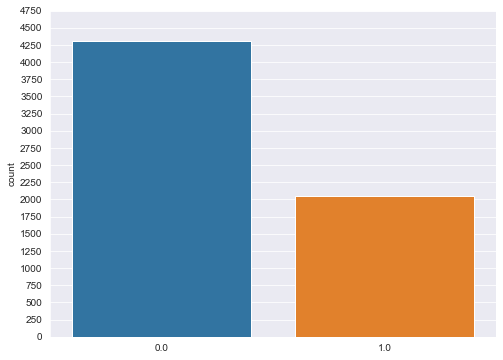

In [12]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

In [13]:
#As we see the visual the dataset is imbalanced
rdm = RandomOverSampler()
X,y = rdm.fit_sample(X,y)
df = pd.concat([X,y],axis=1)
print(df[df['affairs']==0].shape)
print(df[df['affairs']==1].shape)

(4313, 18)
(4313, 18)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


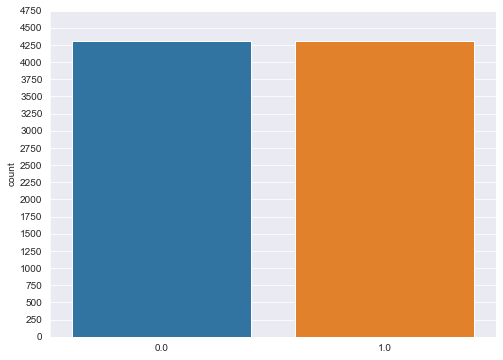

In [14]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

## Step 3: Data Visualization

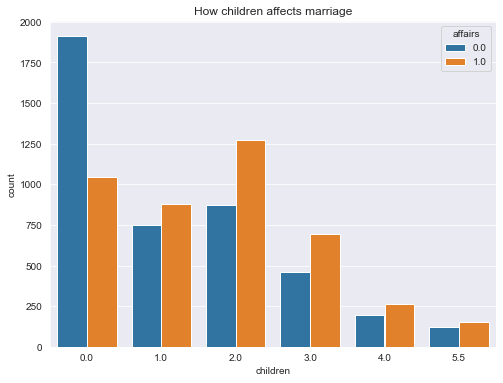

In [15]:
#How children affects the husband-wife relationship.
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(x="children",data=df,hue="affairs")
plt.title("How children affects marriage")
plt.show()

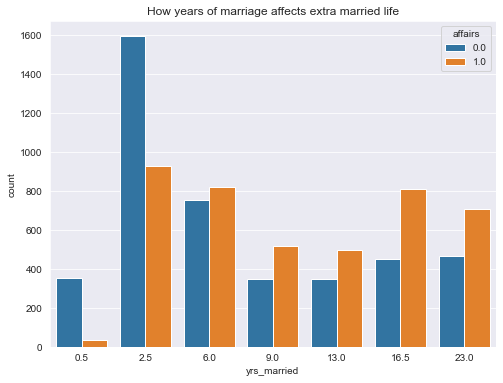

In [16]:
#How years of marriage affects extra married life.
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(data=df,hue="affairs",x='yrs_married')
plt.title("How years of marriage affects extra married life")
plt.show()

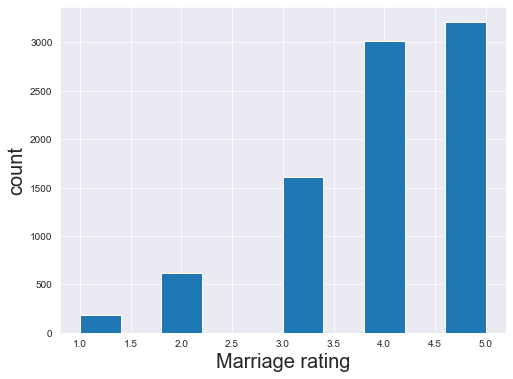

In [17]:
#How women rate their married life on a scale of 1 to 5.
plt.figure(figsize=(8,6))
plt.hist(df["rate_marriage"])
plt.xlabel("Marriage rating",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

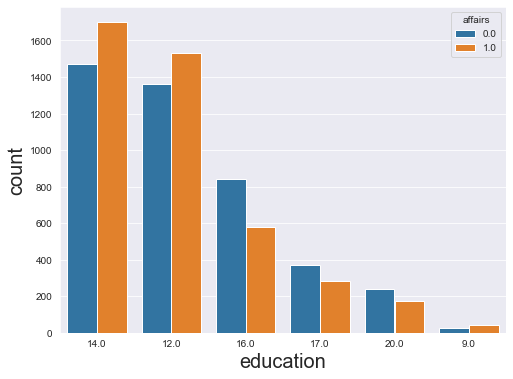

In [18]:
#Let’s see how education make an impact on married life
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(x="educ",hue="affairs",data=df,order=df["educ"].value_counts().index)
plt.xlabel("education",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

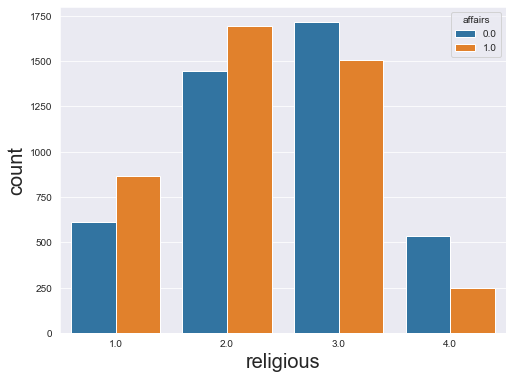

In [19]:
#How the marriage of women affect by religiousness
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(x="religious",hue="affairs",data=df)
plt.xlabel("religious",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()


## Step 4: Modeling

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6900, 17)
(1726, 17)
(6900, 1)
(1726, 1)


### 1. Solver : lbfgs & Penalty : l2

In [21]:
LR = LogisticRegression(solver='lbfgs',penalty='l2')
LR.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y1_pred_train = LR.predict(X_train)
y1_pred_test = LR.predict(X_test)
print('Traning Score : {}'.format(accuracy_score(y1_pred_train,y_train)))
print('Testing Score : {}'.format(accuracy_score(y1_pred_test,y_test)))

Traning Score : 0.6873913043478261
Testing Score : 0.6767091541135574


### 2. Solver : liblinear & Penalty : l1

In [23]:
LR2 = LogisticRegression(solver='liblinear',penalty='l1')
LR2.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='l1', solver='liblinear')

In [24]:
y2_pred_train = LR2.predict(X_train)
y2_pred_test = LR2.predict(X_test)
print('Traning Score : {}'.format(accuracy_score(y2_pred_train,y_train)))
print('Testing Score : {}'.format(accuracy_score(y2_pred_test,y_test)))

Traning Score : 0.6898550724637681
Testing Score : 0.6796060254924682


### 3. Solver : liblinear & Penalty : l2

In [25]:
LR3 = LogisticRegression(solver='liblinear',penalty='l2')
LR3.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [26]:
y3_pred_train = LR3.predict(X_train)
y3_pred_test = LR3.predict(X_test)
print('Traning Score : {}'.format(accuracy_score(y3_pred_train,y_train)))
print('Testing Score : {}'.format(accuracy_score(y3_pred_test,y_test)))

Traning Score : 0.6901449275362319
Testing Score : 0.6772885283893395


**So From Above 3rd Model Gives High Accuracy**

## Step 4: Evaluation

Classification Report :               precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       922
         1.0       0.65      0.67      0.66       804

    accuracy                           0.68      1726
   macro avg       0.68      0.68      0.68      1726
weighted avg       0.68      0.68      0.68      1726



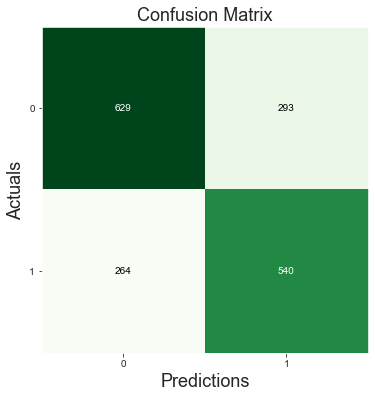

In [27]:
print("Classification Report : {}".format(classification_report(y3_pred_test,y_test)))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y3_pred_test,y_test), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

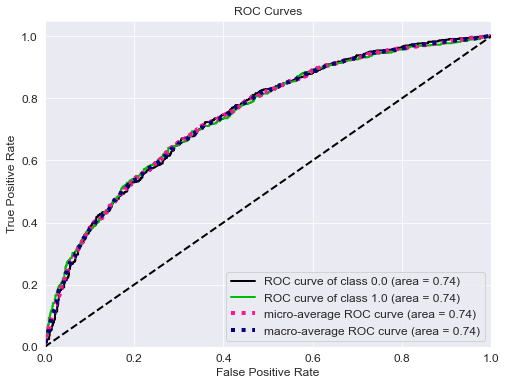

In [28]:
pred_probab=LR3.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test,pred_probab,text_fontsize="large",figsize=(8,6))

In [29]:
prob = LR3.predict_proba(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3,17]]))*100
print("Prediction chance of your model : {}".format(prob))

Prediction chance of your model : [[88.5102453 11.4897547]]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
print("your prediction is  :",LR3.predict(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3,17]])))

your prediction is  : [0.]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Step 5 : Dump

In [31]:
file = 'Logistic_Regression.sav'
pickle.dump(LR3,open(file,'wb'))